In [1]:
import gurobipy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stocks2019.csv', index_col='X')
df.sample(5)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-10-22,7874.620117,54.163773,261.089996,31.510000,99.279999,213.600006,1241.199951,1242.800049,1765.729980,199.350037,...,30.670000,236.910004,181.610001,150.021362,191.059998,53.213219,153.020004,57.641258,62.574783,94.434364
2019-11-08,8255.889648,53.945210,292.459991,36.290001,110.790001,259.920013,1309.000000,1311.369995,1785.880005,215.194473,...,34.169998,239.289993,183.789993,135.845718,201.309998,56.983936,162.419998,50.942886,58.549969,94.325455
2019-11-12,8263.790039,51.610565,291.720001,36.709999,109.440002,258.970001,1297.209961,1298.800049,1778.000000,215.389130,...,33.770000,243.970001,184.389999,137.176865,203.860001,60.331402,163.710007,51.452122,58.637672,93.999504
2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,190.739777,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180
2019-06-25,7591.540039,45.898136,287.970001,28.860001,125.150002,276.019989,1087.579956,1086.349976,1878.270020,178.242752,...,35.000000,348.690002,207.899994,143.144516,180.149994,50.471363,204.520004,39.442490,59.056210,107.805344


In [3]:
returns = df / df.shift(1)
returns = returns[1:]
returns.sample(5)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-09-13,0.996919,1.009017,1.001187,1.015889,0.992056,1.016321,1.004097,1.004302,0.997716,1.007577,...,1.033879,1.003095,0.987237,0.989392,1.014439,1.007739,0.983625,0.998454,0.992706,1.001999
2019-05-16,1.010248,1.021824,1.024312,1.015591,1.023285,1.015842,1.011701,1.012687,1.019464,1.008906,...,0.996150,1.007455,1.015216,1.009589,1.020074,0.995449,1.034197,0.991207,1.008913,0.927304
2019-05-24,0.999046,1.002370,1.001896,1.003035,1.013644,1.011759,0.994124,0.993601,1.004296,0.995178,...,0.964893,0.991889,1.000514,1.000352,0.992833,1.003100,1.026300,0.987708,0.998308,0.989345
2019-05-13,0.965412,0.943286,0.961290,0.938484,0.956185,0.963408,0.973408,0.972309,0.964391,0.975269,...,0.951750,0.962097,0.972102,0.984362,0.974889,0.975665,0.953570,0.937418,1.009963,0.946288
2019-07-24,1.007046,1.020470,1.007763,1.018513,0.988156,1.008060,0.992753,0.992672,1.003169,0.998636,...,0.988224,1.002699,1.005099,0.999735,0.989158,1.010064,1.012360,1.024652,1.000828,1.038184


In [4]:
correlation = returns.iloc[:,1:].corr()
correlation

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


# Question 2

## Stock selection

In [5]:
n = len(correlation)
m = 5
dec_var = n + n*n

In [6]:
obj = np.array([0] * n + np.array(correlation).flatten().tolist())

# We are initializing the constraint matrix
eq = 1 + n + n*n
var = dec_var
A = np.zeros((eq, var))                    
b = np.zeros(eq)
sense = np.array(['<'] * eq )
vtype = ['B'] * dec_var

A[0,:n] = 1

for i in range(n):
    A[1 + i, n + i*n : n + i*n + n] = 1

for i in range(n):
    for j in range(n):
        A[1 + n + i*n + j, n + n*i + j] = 1
        A[1 + n + i*n + j, j] = -1

b[0] = m
b[1:n] = 1
sense[:n] = '='

print(obj)

for i in range(eq):
    print(A[i,], sense[i], b[i])

[ 0.          0.          0.         ...  0.516958   -0.11755175
  1.        ]
[1. 1. 1. ... 0. 0. 0.] = 5.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0.] = 1.0
[0. 0. 0. ... 0. 0. 0

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[-1.  0.  0. ...  0.  0.  0.] < 0.0
[ 0. -1.  0. ...  0.  0.  0.] < 0.0
[ 0.  0. -1. ...  0.  0.  0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.

[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. ... 0. 0. 0.] < 0.0
[0. 0. 0. 

In [7]:
opModel = gp.Model()

opModX = opModel.addMVar(len(obj), vtype=vtype)

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

opModel.Params.OutputFlag = 0
opModel.optimize()  

print(opModel.objVal)
print(opModX.x)

Academic license - for non-commercial use only - expires 2022-08-25
Using license file /Users/abhinavsharma/gurobi.lic
54.199120202352304
[-0. -0.  0. ...  0.  0.  0.]


In [8]:
print("Stocks chosen:")
stocks_chosen = []
for i in range(n):
    if opModX.x[i] == 1:
        print(correlation.index[i])
        stocks_chosen = stocks_chosen + [i]

Stocks chosen:
LBTYK
MXIM
MSFT
VRTX
XEL


## Portofolio Weights 

In [9]:
obj = np.array([0] * m + [1] * len(returns))

# We are initializing the constraint matrix
eq = 1 + (len(returns) * 2)
var = m + len(returns)
A = np.zeros((eq, var))                     
b = np.zeros(eq)
sense = np.array(['<'] * eq )

A[0,:m] = 1
b[0] = 1
sense[0] = '='

for i in range(len(returns)):
    for j in range(m):
        A[2*i + 1, j] = returns.iloc[i, stocks_chosen[j]+1]
        A[2*i + 2, j] = returns.iloc[i, stocks_chosen[j]+1]
    A[2*i + 1, 5 + i] = 1
    A[2*i + 2, 5 + i] = -1
    b[2*i + 1] = returns['NDX'].iloc[i]
    b[2*i + 2] = returns['NDX'].iloc[i]
    sense[2*i + 1] = '>'
    sense[2*i + 2] = '<'

print(obj)

for i in range(eq):
    print(A[i,], sense[i], b[i])

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

  0.          0.          0.        ] < 1.019428424899717
[1.01600933 1.02618087 1.00913267 0.99613856 0.99713935 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

 0.         0.         0.        ] > 1.0064794077122217
[ 0.95777592  1.01101435  1.00622112  1.00883071  1.00046945  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.      

In [10]:
opModel = gp.Model()

opModX = opModel.addMVar(len(obj))

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

opModel.Params.OutputFlag = 0
opModel.optimize()  

print(opModel.objVal)
print("Weights")
print(opModX.x[:m])

weights = opModX.x[:m]

0.7891782824631466
Weights
[0.04886175 0.21038806 0.58035198 0.07119022 0.089208  ]


In [11]:
returns['portfolio'] = 0

for i in range(m):
    returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, stocks_chosen[i]+1]

In [12]:
returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
returns['portfolio_performance'] = returns['portfolio_performance'].abs()
print("Performance on 2019 stocks - ", returns['portfolio_performance'].sum())

Performance on 2019 stocks -  0.7891782824631449


In [13]:
df_20 = pd.read_csv('stocks2020.csv', index_col=0)


returns_20 = df_20 / df_20.shift(1)
returns_20 = returns_20[1:]

In [14]:
returns_20['portfolio'] = 0

for i in range(m):
    returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, stocks_chosen[i]+1]

returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())

Performance on 2020 stocks -  1.1124373455076444


# Task 3

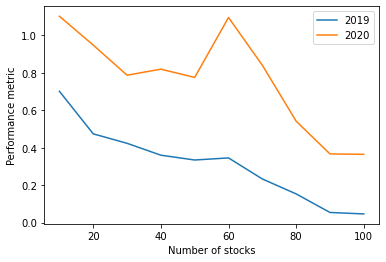

In [15]:
n = len(correlation)
dec_var = n + n*n
max_m = 100
min_m = 10
step = 10

performance_2019 = []
performance_2020 = []

for m in range(min_m, max_m + step, step):
    
    #print("\n------Portfoloio for ",m, "stocks---------------")
    
    ######### stock selection ########
    if m >= n:
        stocks_chosen = list(range(1,n+1))
        stock_name = correlation.index
    else:

        ### IP definition
        obj = np.array([0] * n + np.array(correlation).flatten().tolist())

        eq = 1 + n + n*n
        var = dec_var
        A = np.zeros((eq, var))                    
        b = np.zeros(eq)
        sense = np.array(['<'] * eq )
        vtype = ['B'] * dec_var

        A[0,:n] = 1

        for i in range(n):
            A[1 + i, n + i*n : n + i*n + n] = 1

        for i in range(n):
            for j in range(n):
                A[1 + n + i*n + j, n + n*i + j] = 1
                A[1 + n + i*n + j, j] = -1

        b[0] = m
        b[1:n] = 1
        sense[:n] = '='

        ## gurobi
        opModel = gp.Model()

        opModX = opModel.addMVar(len(obj), vtype=vtype)

        opModCon = opModel.addMConstrs(A, opModX, sense, b)
        opModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

        opModel.Params.OutputFlag = 0
        opModel.optimize()  
        
        ## stocks
        stocks_chosen = []
        stock_name = []
        for i in range(n):
            if opModX.x[i] == 1:
                stock_name = stock_name + [correlation.index[i]]
                stocks_chosen = stocks_chosen + [i]


    ######## portfolio management ########

    ### LP definition
    obj = np.array([0] * m + [1] * len(returns))

    # We are initializing the constraint matrix
    eq = 1 + (len(returns) * 2)
    var = m + len(returns)
    A = np.zeros((eq, var))                     
    b = np.zeros(eq)
    sense = np.array(['<'] * eq )

    A[0,:m] = 1
    b[0] = 1
    sense[0] = '='

    for i in range(len(returns)):
        for j in range(m):
            A[2*i + 1, j] = returns.iloc[i, stocks_chosen[j]+1]
            A[2*i + 2, j] = returns.iloc[i, stocks_chosen[j]+1]
        A[2*i + 1, m + i] = 1
        A[2*i + 2, m + i] = -1
        b[2*i + 1] = returns['NDX'].iloc[i]
        b[2*i + 2] = returns['NDX'].iloc[i]
        sense[2*i + 1] = '>'
        sense[2*i + 2] = '<'


    ## gurobi

    opModel = gp.Model()

    opModX = opModel.addMVar(len(obj))

    opModCon = opModel.addMConstrs(A, opModX, sense, b)
    opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

    opModel.Params.OutputFlag = 0
    opModel.optimize()  

    weights = opModX.x[:m]
    
    #print(pd.Series(weights, index = stock_name))

    returns['portfolio'] = 0

    for i in range(m):
        returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, stocks_chosen[i]+1]

    returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
    returns['portfolio_performance'] = returns['portfolio_performance'].abs()
    #print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())
    performance_2019 = performance_2019 + [returns['portfolio_performance'].sum()]
    
    returns_20['portfolio'] = 0

    for i in range(m):
        returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, stocks_chosen[i]+1]

    returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
    returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
    #print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())
    performance_2020 = performance_2020 + [returns_20['portfolio_performance'].sum()]

    
plt.plot(range(min_m, max_m + step, step), performance_2019, label = '2019')
plt.plot(range(min_m, max_m + step, step), performance_2020, label = '2020')
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Performance metric')
plt.show()

# Task 4

### Task 4 - Task 2

In [16]:
m = 5

# weights + ON variables + returns
obj = np.array([0] * n + [0] * n + [1] * len(returns))

vtype = ['C'] * n + ['B'] * n + ['C'] * len(returns)

eq = 1 + 1 + n + (len(returns) * 2)
var = n + n + len(returns)
A = np.zeros((eq, var))                     
b = np.zeros(eq)
sense = np.array(['<'] * eq )

# sum of weights is 1
A[0,:n] = 1
b[0] = 1
sense[0] = '='

# Total number of stocks < m
A[1, n : 2*n] = 1
b[1] = m
sense[1] = '='

# wi > 0 iff yi > 0 ==> wi < yi ==> wi - yi < 0
for i in range(n):
    A[2 + i, i] = 1
    A[2 + i, i + n] = -1

# follow the index
for i in range(len(returns)):
    for j in range(n):
        A[2*i + 1 + n + 1, j] = returns.iloc[i, j+1]
        A[2*i + 2 + n + 1, j] = returns.iloc[i, j+1]
    A[2*i + 1 + n + 1, n + n + i] = 1
    A[2*i + 2 + n + 1, n + n + i] = -1
    b[2*i + 1 + n + 1] = returns['NDX'].iloc[i]
    b[2*i + 2 + n + 1] = returns['NDX'].iloc[i]
    sense[2*i + 1 + n + 1] = '>'
    sense[2*i + 2 + n + 1] = '<'

opModel = gp.Model()

opModX = opModel.addMVar(len(obj), vtype = vtype)

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

opModel.Params.OutputFlag = 0
opModel.Params.TimeLimit = 30
opModel.optimize()  

weights = opModX.x[:n]

returns['portfolio'] = 0

for i in range(n):
    returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, i+1]

returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
returns['portfolio_performance'] = returns['portfolio_performance'].abs()
print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())

returns_20['portfolio'] = 0

for i in range(n):
    returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, i+1]

returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())


Performance on 2019 stocks -  0.5087677165175694
Performance on 2020 stocks -  0.9012349065783466


In [ ]:
max_m = 100
min_m = 10
step = 10

performance_2019 = []
performance_2020 = []

for m in range(min_m, max_m + step, step):
    # weights + ON variables + returns
    obj = np.array([0] * n + [0] * n + [1] * len(returns))

    vtype = ['C'] * n + ['B'] * n + ['C'] * len(returns)

    eq = 1 + 1 + n + (len(returns) * 2)
    var = n + n + len(returns)
    A = np.zeros((eq, var))                     
    b = np.zeros(eq)
    sense = np.array(['<'] * eq )

    # sum of weights is 1
    A[0,:n] = 1
    b[0] = 1
    sense[0] = '='

    # Total number of stocks < m
    A[1, n : 2*n] = 1
    b[1] = m
    sense[1] = '='

    # wi > 0 iff yi > 0 ==> wi < yi ==> wi - yi < 0
    for i in range(n):
        A[2 + i, i] = 1
        A[2 + i, i + n] = -1

    # follow the index
    for i in range(len(returns)):
        for j in range(n):
            A[2*i + 1 + n + 1, j] = returns.iloc[i, j+1]
            A[2*i + 2 + n + 1, j] = returns.iloc[i, j+1]
        A[2*i + 1 + n + 1, n + n + i] = 1
        A[2*i + 2 + n + 1, n + n + i] = -1
        b[2*i + 1 + n + 1] = returns['NDX'].iloc[i]
        b[2*i + 2 + n + 1] = returns['NDX'].iloc[i]
        sense[2*i + 1 + n + 1] = '>'
        sense[2*i + 2 + n + 1] = '<'

    opModel = gp.Model()

    opModX = opModel.addMVar(len(obj), vtype = vtype)

    opModCon = opModel.addMConstrs(A, opModX, sense, b)
    opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

    opModel.Params.OutputFlag = 0
    opModel.Params.TimeLimit = 3600
    opModel.optimize()  

    weights = opModX.x[:n]

    returns['portfolio'] = 0

    for i in range(n):
        returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, i+1]

    returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
    returns['portfolio_performance'] = returns['portfolio_performance'].abs()
    #print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())
    performance_2019 = performance_2019 + [returns['portfolio_performance'].sum()]

    returns_20['portfolio'] = 0

    for i in range(n):
        returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, i+1]

    returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
    returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
    #print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())
    performance_2020 = performance_2020 + [returns_20['portfolio_performance'].sum()]

    
pd.DataFrame({
    'number of stocks' : range(min_m, max_m + step, step),
    '2019' : performance_2019,
    '2020' : performance_2020
}).to_csv('result.csv', index=False)    
plt.plot(range(min_m, max_m + step, step), performance_2019, label = '2019')
plt.plot(range(min_m, max_m + step, step), performance_2020, label = '2020')
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Performance metric')
plt.show()